In [1]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 64)       

In [2]:
img_path = 'E:/Study/study/python/NLP/deeplearning_record/Downloads/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /=255.

#形状为（1，150，150，3）
print(img_tensor.shape)

#预处理单张图像

(1, 150, 150, 3)


In [3]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()
#显示测试图像

<Figure size 640x480 with 1 Axes>

In [4]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

#用一输入张量和一个输出张量列表将模型实例化

In [5]:
activations = activation_model.predict(img_tensor)

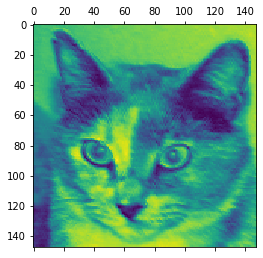

In [6]:
import matplotlib.pyplot as plt
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0,:,:,4] ,cmap='viridis')

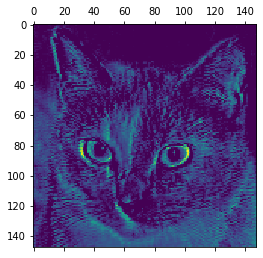

In [7]:
plt.matshow(first_layer_activation[0,:,:,7] ,cmap='viridis')

F:\Program Files\anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


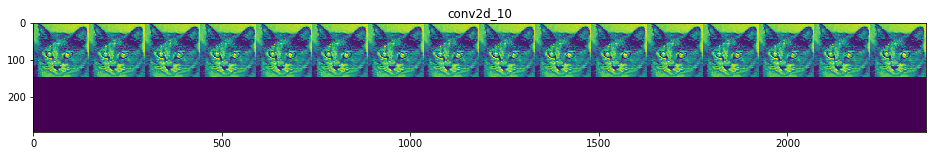

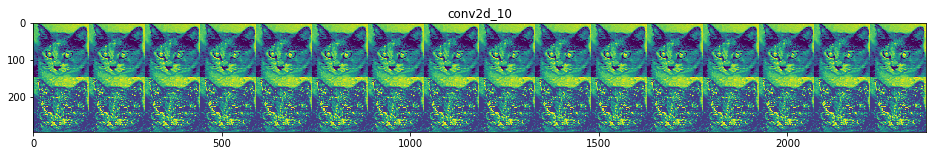

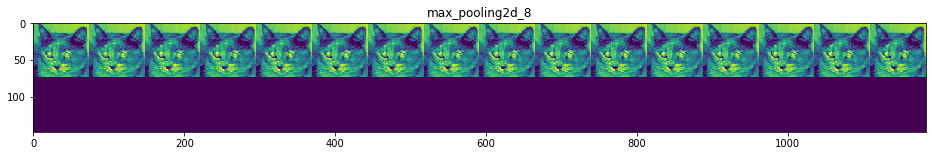

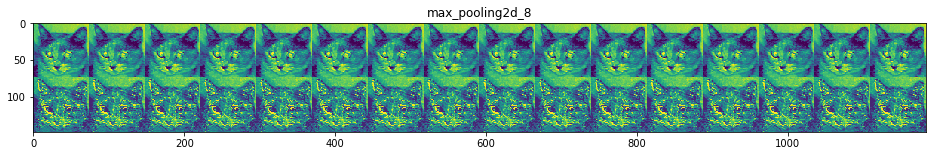

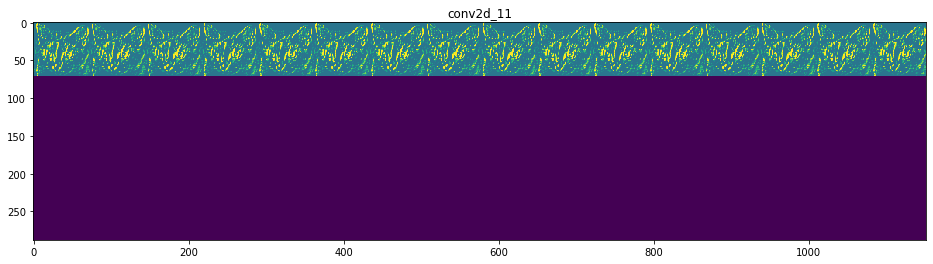

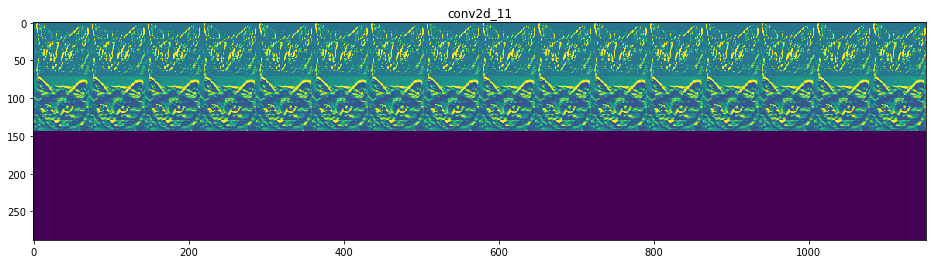

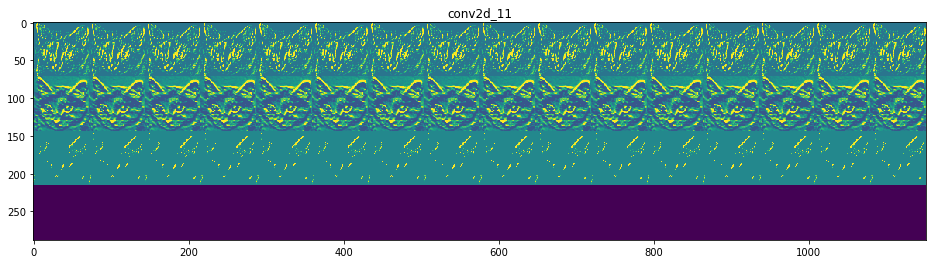

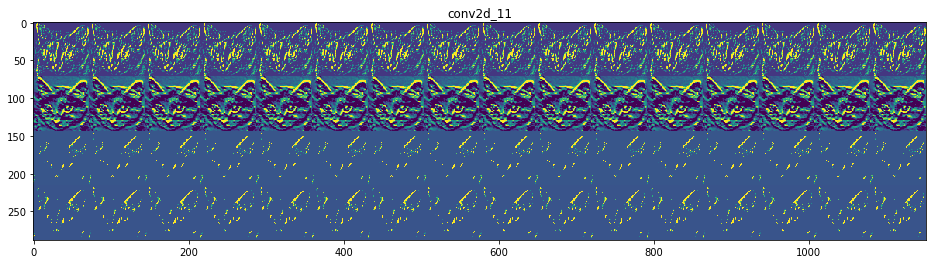

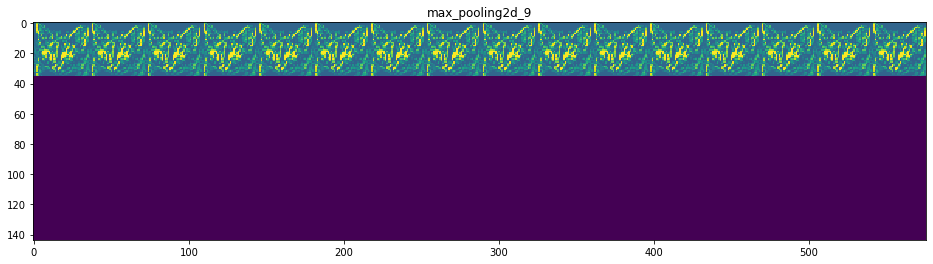

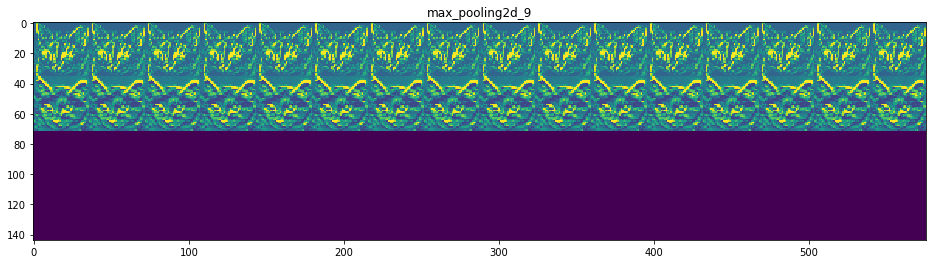

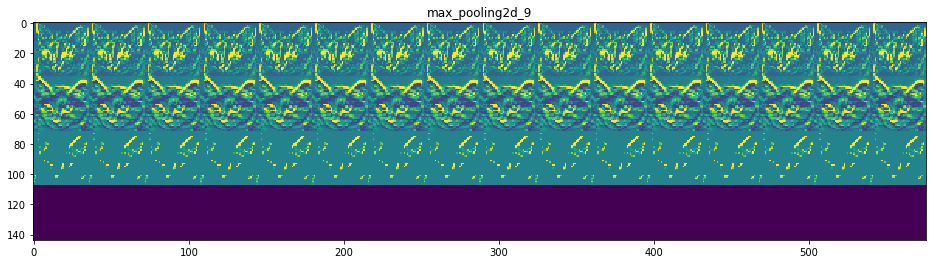

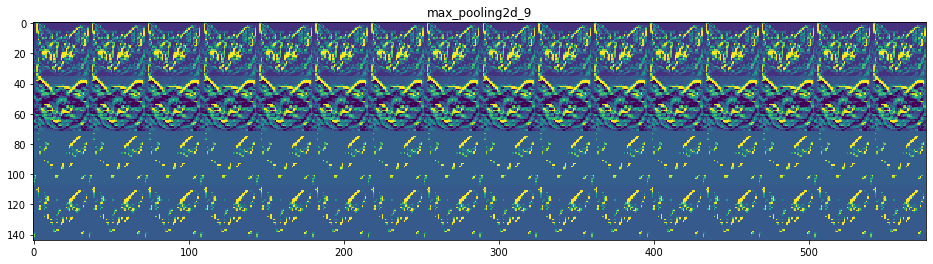

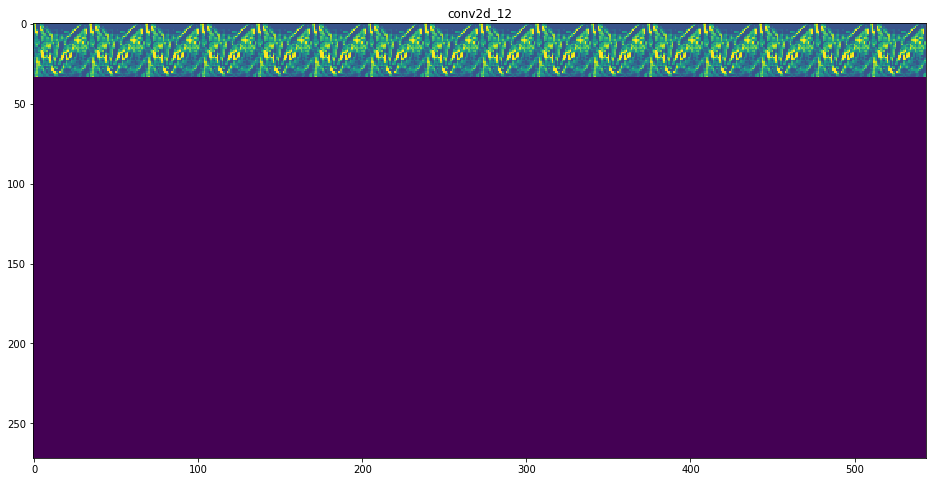

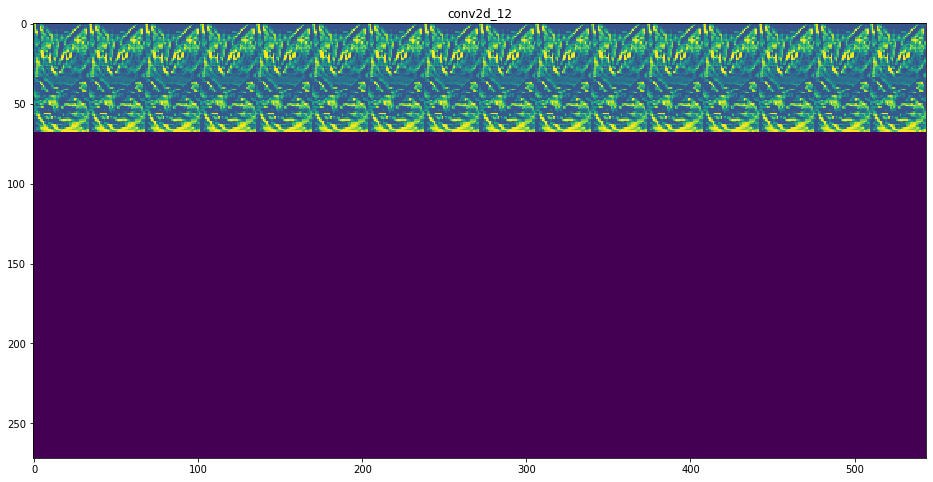

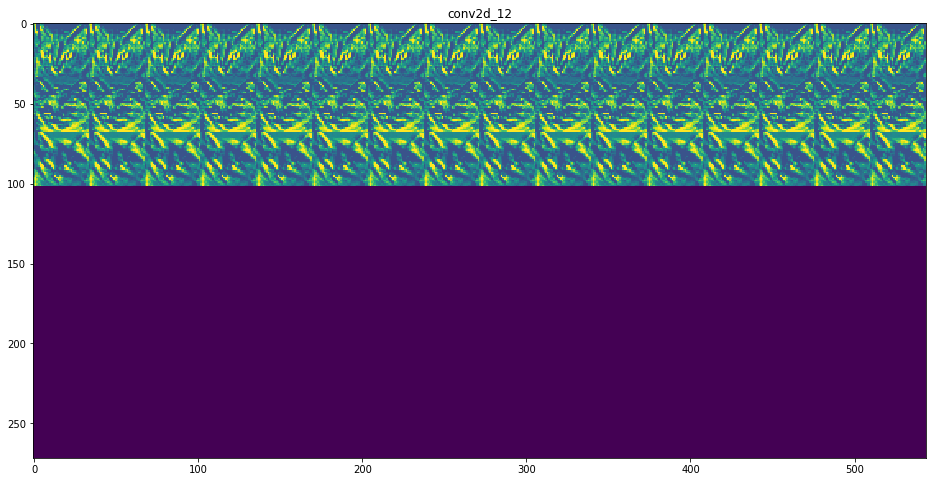

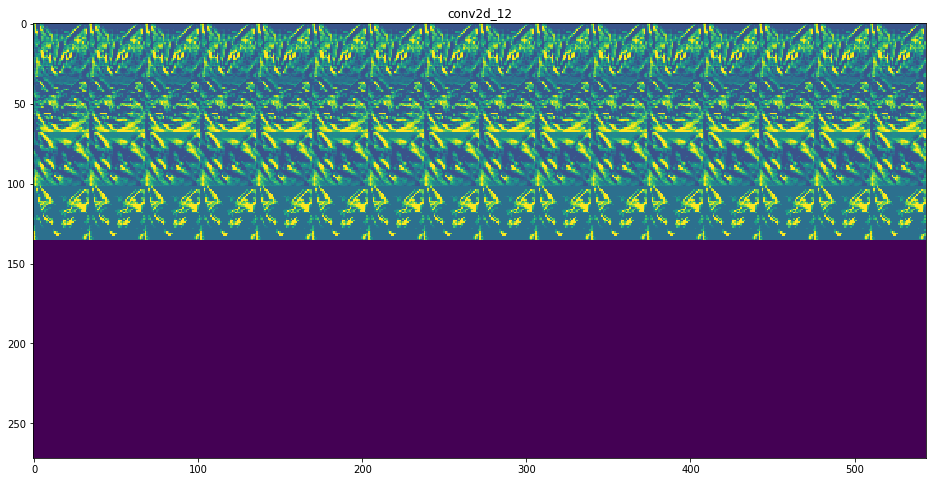

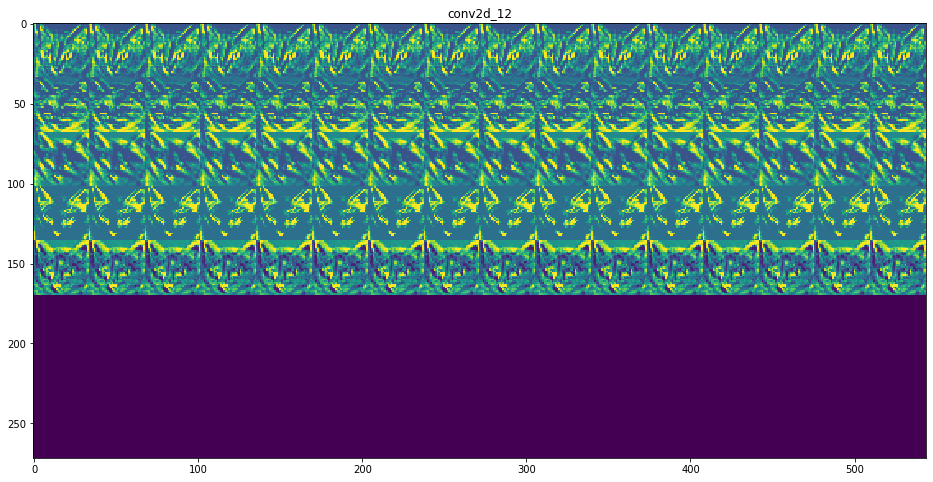

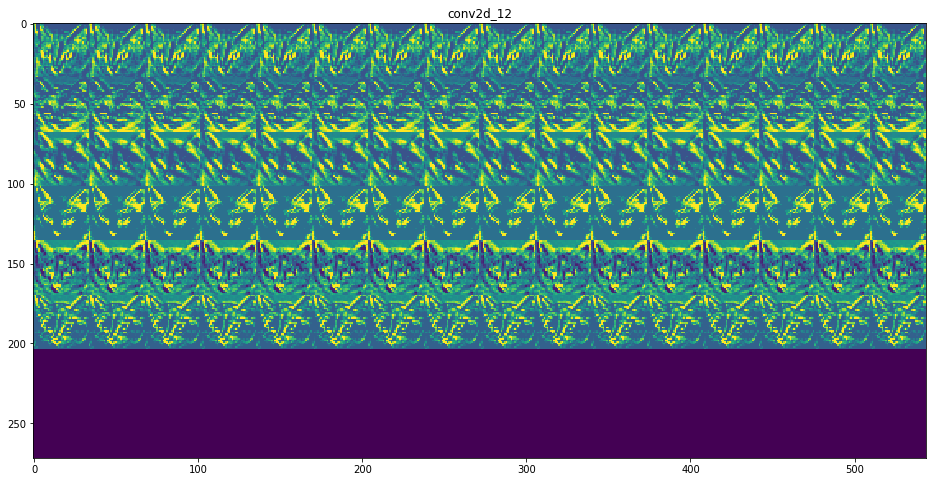

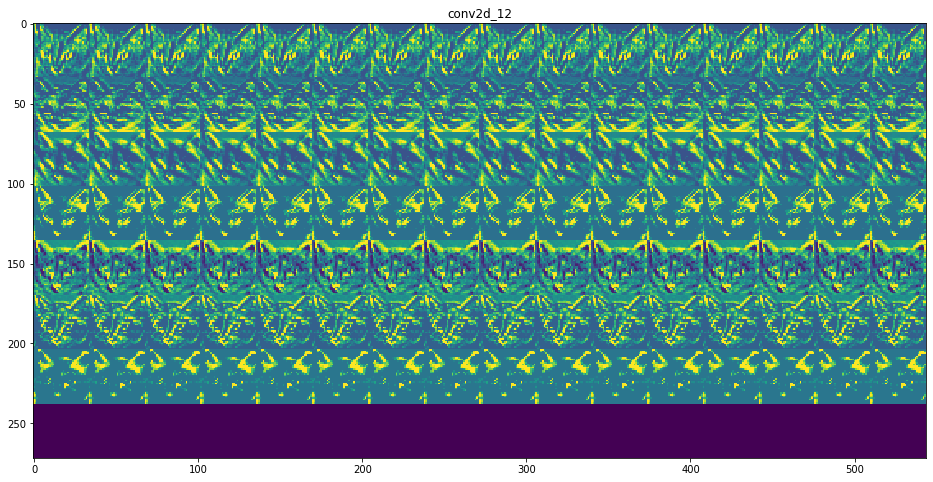

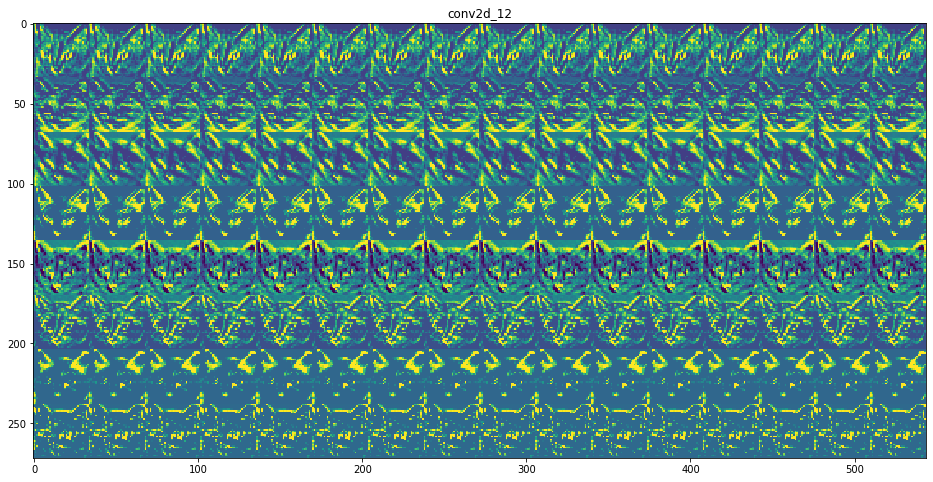

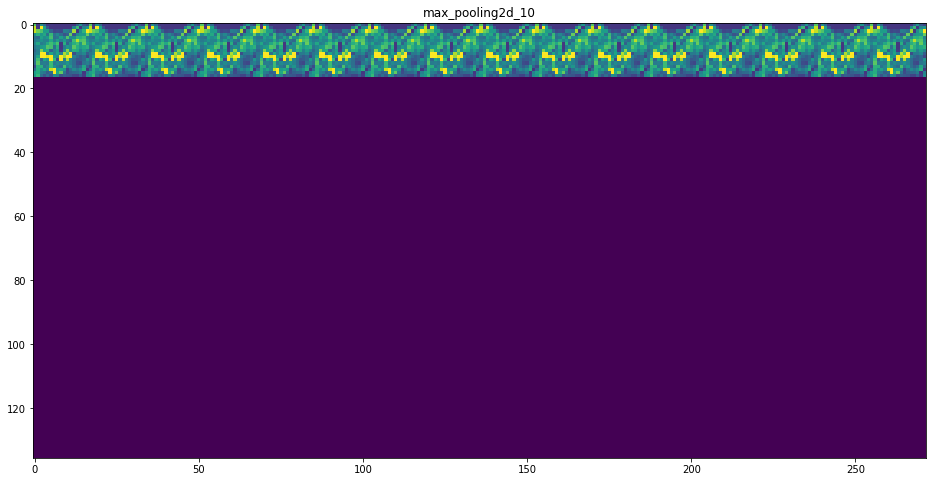

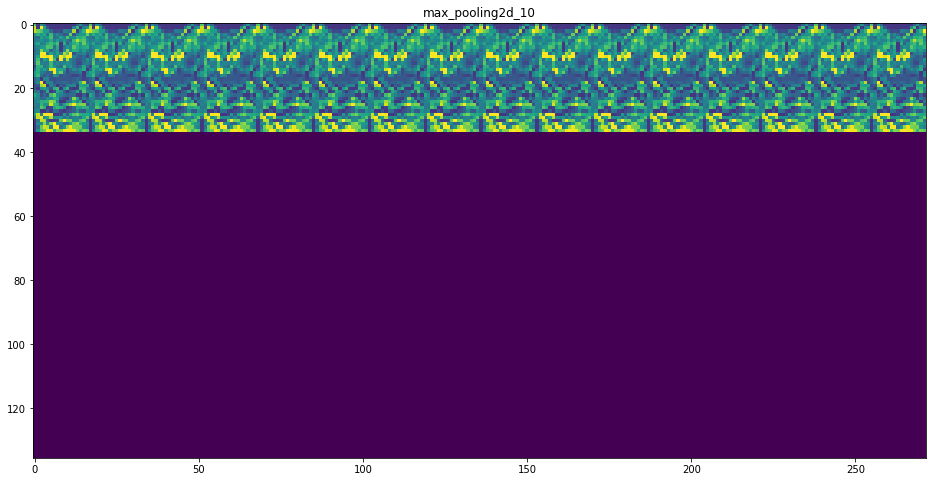

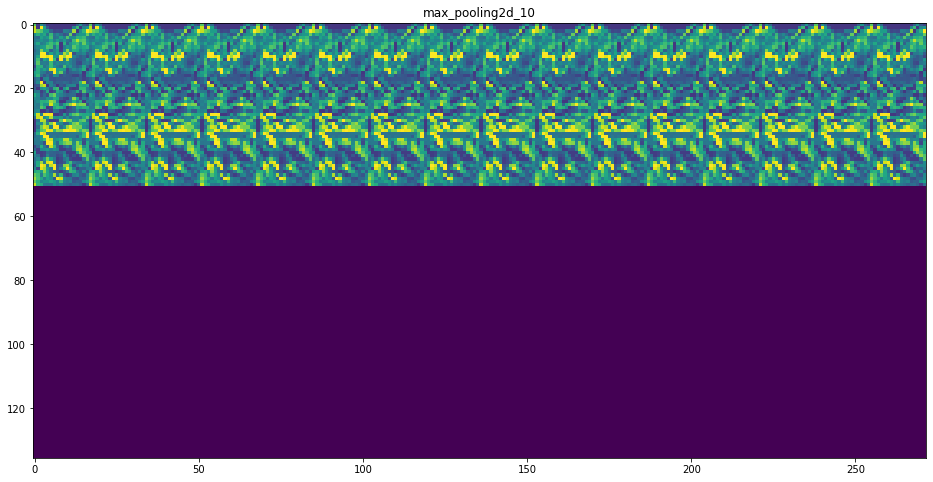

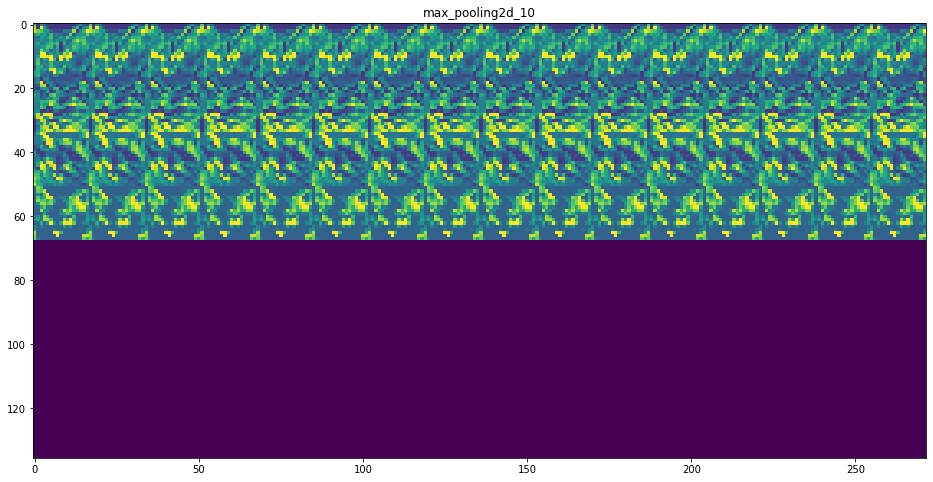

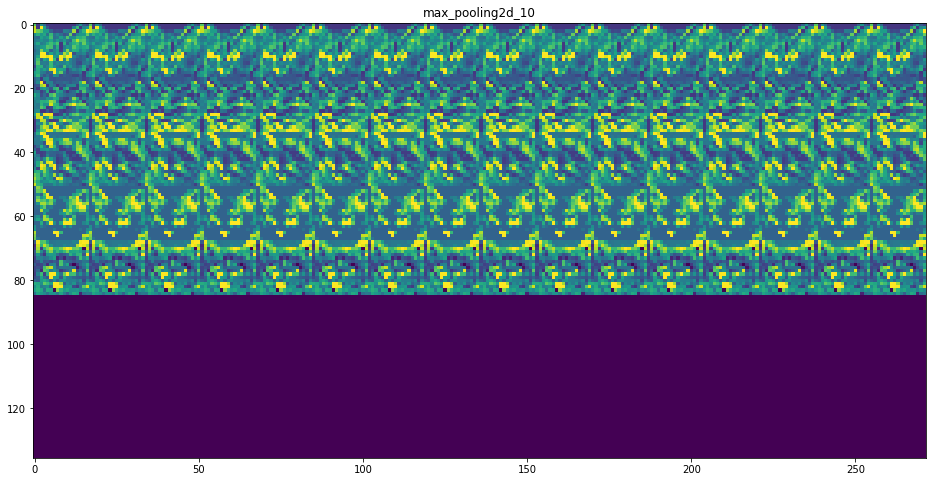

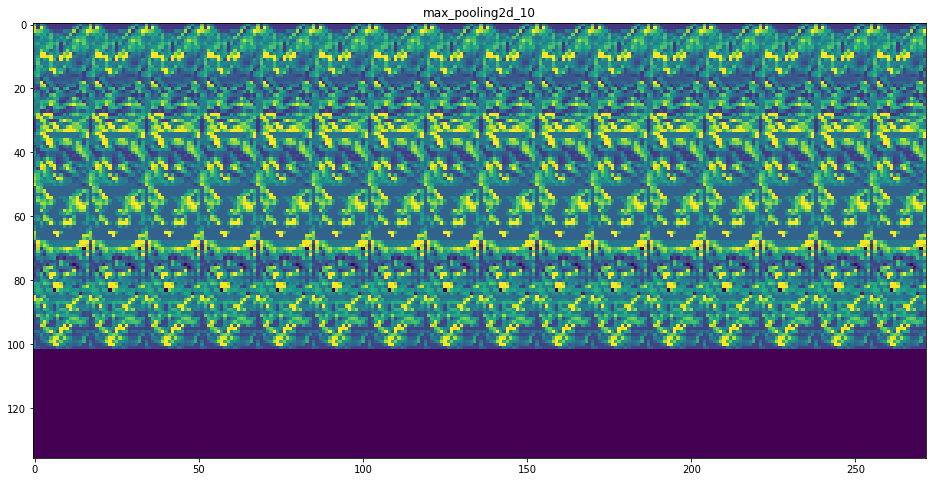

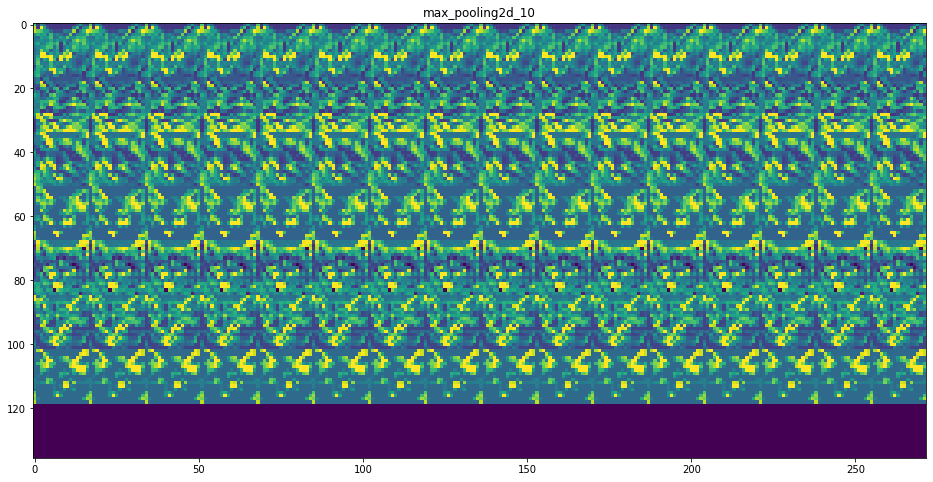

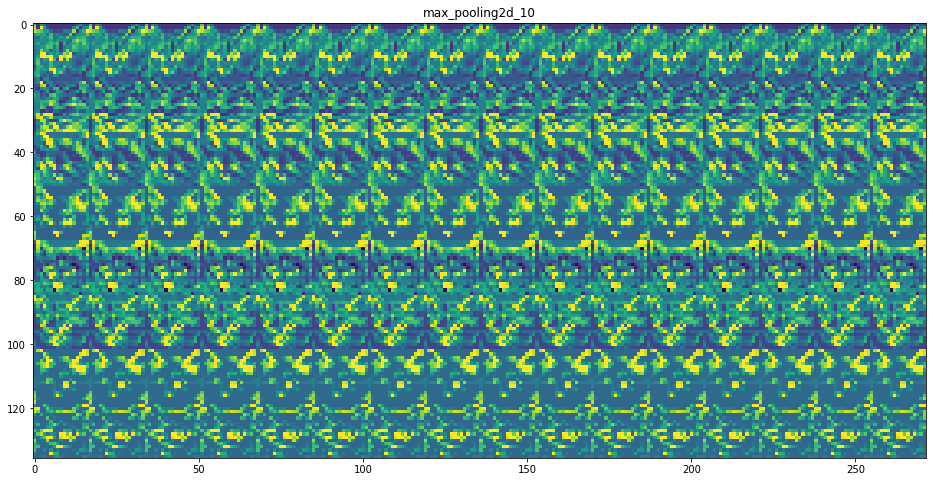

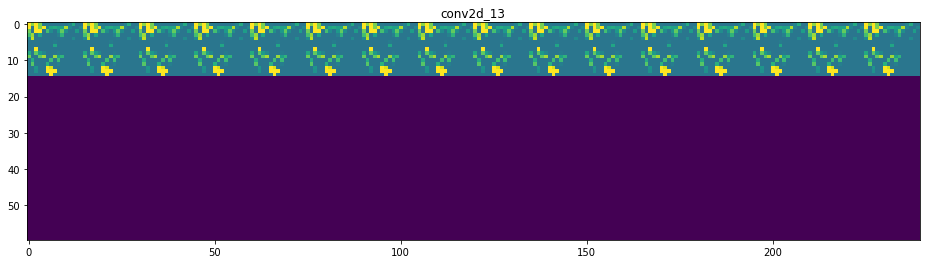

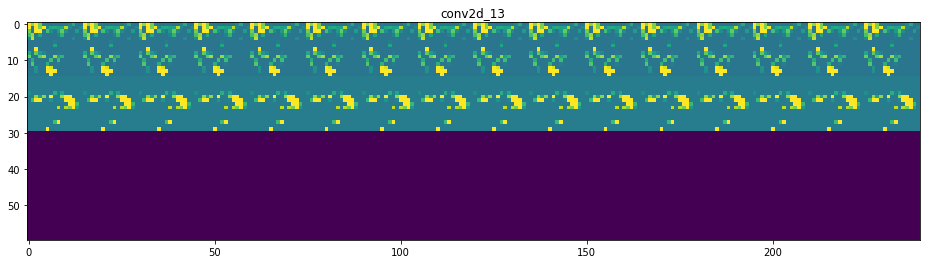

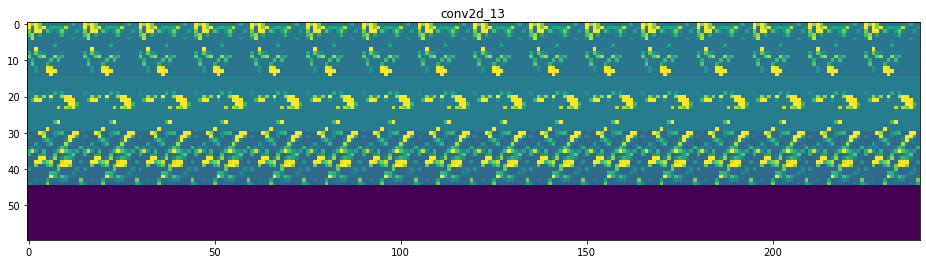

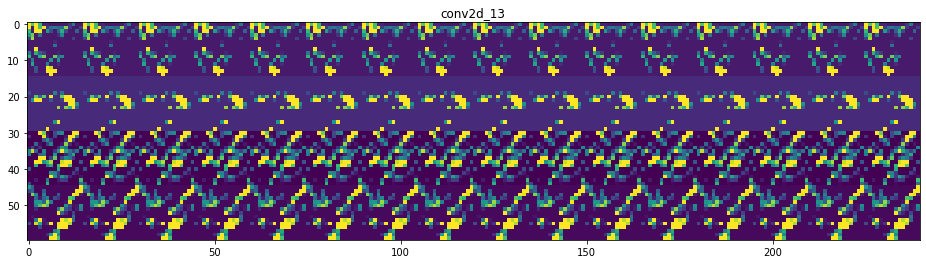

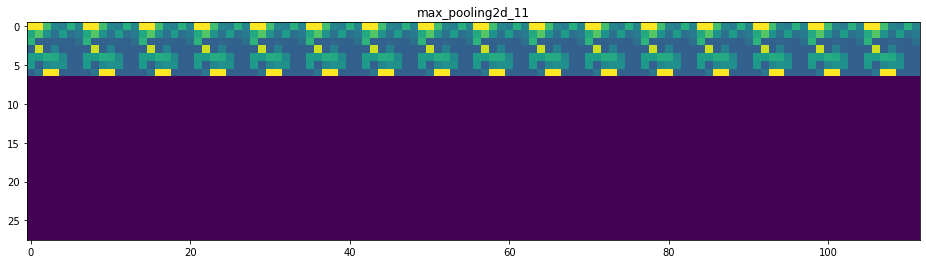

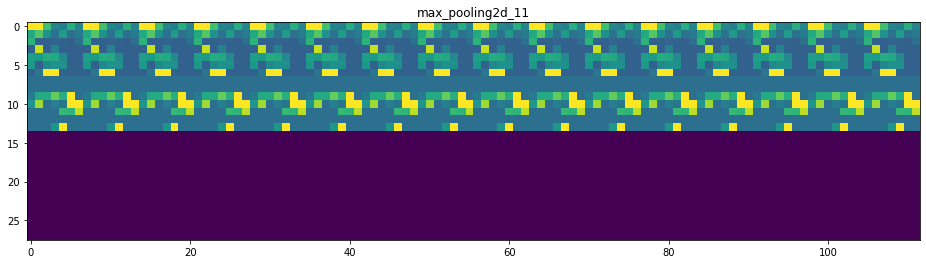

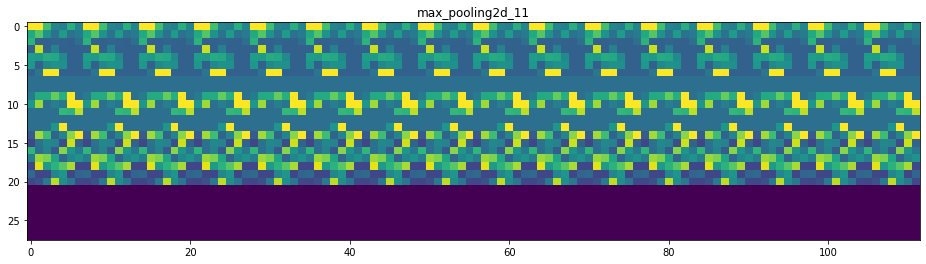

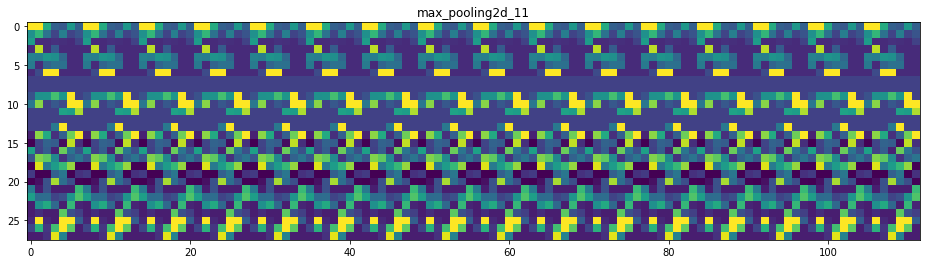

In [8]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row= 16
for layer_name,layer_activation in zip(layer_names,activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols,images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col * images_per_row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col+1) *size,row * size : (row+1) * size] = channel_image
        scale = 1./size
        plt.figure(figsize=(scale * display_grid.shape[1],
                           scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid,aspect='auto',cmap='viridis')